In [1]:
### Load some packages 

import networkx as nx # for handling graphs/networks 
import numpy as np # for basic scientific computing 
import pandas as pd # for basic scientific computing 
import matplotlib.pyplot as plt # for plotting
import matplotlib.gridspec as gridspec
from scipy.special import binom
from scipy.integrate import solve_ivp
#import csv


In [2]:
def list2onehot(y, list_classes=None):
    """
    y = list of class lables of length n
    output = n x k array, i th row = one-hot encoding of y[i] (e.g., [0,0,1,0,0])
    """
    if list_classes is None:
        list_classes = list(np.sort(y))
    Y = np.zeros(shape = [len(y), len(list_classes)], dtype=int)
    for i in np.arange(Y.shape[0]):
        for j in np.arange(len(list_classes)):
            if y[i] == list_classes[j]:
                Y[i,j] = 1
    return Y

In [3]:
c = [2,3,1]
print(list2onehot(c))

[[0 1 0]
 [0 0 1]
 [1 0 0]]


In [4]:
def SBM(W, c):
    # Stochastic block model; 
    # W = (k x k) community weight matrix 
    # c = (n x 1), entries from [k]; community assignment vector
    k = W.shape[0]
    n = len(c)
    
    # C = (n x k) one-hot encoding of community assignment matrix
    C = list2onehot(c, list_classes=[i for i in range(k)])

    # C = (n x n) probability matrix = expected adjacency matrix = C W C.T
    P = C @ W @ C.T
    
    # Now sample the edges according to P
    G = weight2graph(P)
    return G

In [156]:
def weight2digraph(P):
    # P = (n x n) (asymmetric) weight (= edge probability) matrix 
    n = P.shape[0]
    
    # Sample the edges according to P
    G = nx.DiGraph()
    G.add_nodes_from(range(n))
    nodes = list(G.nodes())

    for i in np.arange(n):
        for j in np.arange(n):
            U = np.random.rand()
            if U < P[i,j]:
                G.add_edge(nodes[i],nodes[j])
    return G

In [157]:
def weight2graph(P):
    # P = (n x n) symmetric weight (= edge probability) matrix 
    n = P.shape[0]
    
    # Sample the edges according to P
    G = nx.Graph()
    G.add_nodes_from(range(n))
    nodes = list(G.nodes())

    for i in np.arange(n):
        for j in np.arange(i+1,n):
            U = np.random.rand()
            if U < P[i,j]:
                G.add_edge(nodes[i],nodes[j])
    return G

In [158]:
def RW(G, x0=None, steps=1, return_history=False):
    # simple symmetric random walk on graph G 
    # initialization at x0
    if x0 is None:
        x = np.random.choice(G.nodes())
    else:
        x = x0
    
    history = []
    for i in np.arange(steps):
        if len(list(G.neighbors(x))) == 0:
            print("RW is stuck at isolated node")
            x = np.random.choice(G.nodes()) # re-initialize uniformly at random
        else: 
            x = np.random.choice(list(G.neighbors(x)))

        if return_history:
            history.append(x)
        
    if not return_history: 
        return x 
    else: 
        return history

In [159]:
a = 0.8
b = 0.0
W = b * np.ones([2,2]) + (a-b) * np.eye(2)
# W = np.array([[0.5, 0.1, 0.1], [0.1, 0.5, 0.1], [0.1, 0.1, 0.5]])
print(W)

c = [0]*20 + [1]*80
print(c)
C = list2onehot(c, list_classes=[i for i in range(2)])
# C = (n x n) probability matrix = expected adjacency matrix = C W C.T
P1 = C @ W @ C.T
#plt.imshow(P.todense())
#print(P)
Q1 = np.zeros([100,100])
Q2 = np.zeros([100,100])
for i in range(20,100):
    for j in range(20):
        Q1[i,j] = 0.5

for i in range(20):
    for j in range(20,100):
        Q2[i,j] = 0.01


P2 = P1 + Q1
P3 = P2 + Q2
G1 = weight2digraph(P1)
G2 = weight2digraph(P2)
G3 = weight2digraph(P3)

[[0.8 0. ]
 [0.  0.8]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


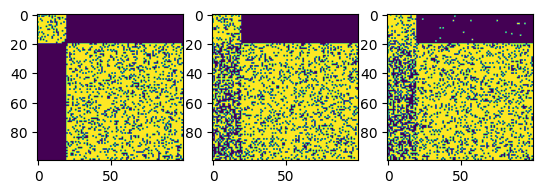

In [152]:
A1 = nx.adjacency_matrix(G1, nodelist=list(G1.nodes()))
#plt.imshow(A1.todense())
A2 = nx.adjacency_matrix(G2, nodelist=list(G2.nodes()))
#plt.imshow(A2.todense())
A3 = nx.adjacency_matrix(G3, nodelist=list(G3.nodes()))

# print(type(A1))

plt.subplot(131)
plt.imshow(A1.todense())
plt.subplot(132)
plt.imshow(A2.todense())
plt.subplot(133)
plt.imshow(A3.todense())


In [10]:
## Toy example - Proof of concept
h1 = RW(G1, x0 = None, steps = 500, return_history = True)
#plt.plot(h1)
h2 = RW(G2, x0 = None, steps = 500, return_history = True)
#plt.plot(h2)
h3 = RW(G3, x0 = None, steps = 500, return_history = True)


(0.0, 105.0)

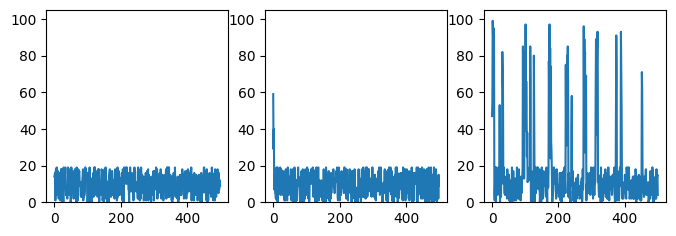

In [11]:
plt.figure(figsize = (8, 2.5))
plt.subplot(131)
plt.plot(h1)
plt.ylim([0,105])
plt.subplot(132)
plt.ylim([0,105])
plt.plot(h2)
plt.subplot(133)
plt.plot(h3)
plt.ylim([0,105])

In [12]:
## Toy example from the Steven's note

# Dynamical system
# \dot{x}_1 = \mu x_1
# \dot{x}_2 = \lambda (x_2 - x_1^2)

# A three-dimensional linear Koopman system with y_1 = x_1, y_2 = x_2, y_3 = x_1^2.
# \dot{y}_1 = \mu y_1
# \dot{y}_2 = \lambda (y_2 - y_3)
# \dot{y}_3 = \mu (y_3)
def toy_c1(t, x, mu0, lambda0): # Here, c1 stands for the first continuous example.
    #mu0, lambda0 = kappa[0], kappa[1]
    dx = np.zeros([2])
    #dx = [mu0 * x[0], lambda0 * (x[0] - np.power(x[1], 2))]
    dx[0] = mu0 * x[0]
    dx[1] = lambda0 * (x[1] - np.power(x[0], 2))
    return dx

def toy_c1_Koop(t, y, mu0, lambda0):
    #mu0, lambda0 = kappa[0], kappa[1]
    dy = np.zeros([3])
    dy[0] = mu0 * y[0]
    dy[1] = lambda0 * (y[1] - y[2])
    dy[2] = 2 * mu0 * y[2]
    return dy



In [13]:
x=np.zeros([2,10])
x0 = np.ones([2])
#x.shape[0]
x[:,2] = x0
#print(x[:,2])
print(x0)
print(x)

[1. 1.]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


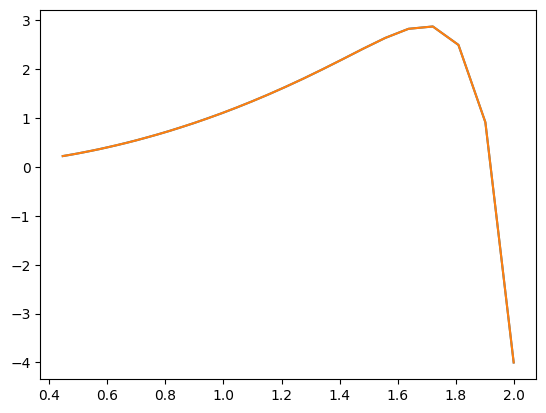

In [14]:
tspan1 = (0.0, 30.0)
t_eval = np.arange(tspan1[0], tspan1[1]+1, 1)
x_init = [2,-4]
#x_init = np.random.uniform(low=4, high=6, size=2)
y_init = [x_init[0], x_init[1], np.power(x_init[0],2)]
#kappa1 = np.random.uniform(low=[,3], high=[3,5], size=2)
kappa1 = [-0.05, -1]

sol_c1 = solve_ivp(toy_c1, tspan1, x_init, args = kappa1, method='RK45', t_eval = t_eval)
sol_c1_Koop = solve_ivp(toy_c1_Koop, tspan1, y_init, args = kappa1, method='RK45', t_eval=t_eval) 
#plt.plot(sol1.t, sol1.y[0])
plt.plot(sol_c1.y[0], sol_c1.y[1])
plt.plot(sol_c1_Koop.y[0], sol_c1_Koop.y[1])


In [107]:
def toy_d1(t, x0, mu0, lambda0): # Here, d1 stands for the first discrete example.
    # t must be a positive integer.
    # x0 is the initial value x(0) = x0
    #mu0, lambda0 = kappa[0], kappa[1]
    x_mat = np.zeros([len(x0),t]) # matrix for saving trajectories. It does not save the initial value.
    x_old = x0.copy()
    x_new = x_old
    for i in range(t):
        x_new[0] = (1+mu0)*x_old[0]
        x_new[1] = (1+lambda0)*x_old[1]
        x_mat[:,i] = x_new
    return x_mat

def toy_d1_F(x_old, mu0, lambda0):
    x_new = x_old.copy()
    x_new[0] = (1+mu0)*x_old[0]
    x_new[1] = (1+lambda0)*x_old[1]
    return x_new

def toy_d2_F(x_old, mu0, lambda0):
    x_new = x_old.copy()
    x_new[0] = (1+mu0)*x_old[0]
    x_new[1] = (1+lambda0)*x_old[1] - lambda0 * np.power(x_old[0],2)
    return x_new

def toy_d2_Koopman(x_old, mu0, lambda0):
    x_new = x_old.copy()
    x_new[0] = (1+mu0)*x_old[0]
    x_new[1] = (1+lambda0)*x_old[1] - lambda0 * x_old[2]
    x_new[2] = np.power((1+mu0), 2)*x_old[2]
    return x_new

def psi_id(x):
    return x
    
def psi_d1(x):
    return x

def psi_d2(x):
    obs = np.zeros(9) # 20 = the total number of observable functions, psi_m's.
    idx = 0 
    for i in range(1,4):
        for j in range(i+1):
            obs[idx] = np.power(x[0], i-j) * np.power(x[1], j)
            idx += 1
    return obs

def psi_d2_ans(x):
    obs = np.zeros(3) # = the total number of observable functions, psi_m's.
    obs[0] = x[0]
    obs[1] = x[1]
    obs[2] = np.power(x[0],2)
    
    return obs
            

In [129]:
## Compute a Koopman matrix from simulated data.
mu0 = -0.1
lambda0 = -0.2

K_true = [[1+mu0, 0], [0, 1+lambda0]]
#x0 = [2,1]

d = 2 # the number of variables (=the dimension) of the original dynamical system.
M = 100 # the number of observed data. 
N = 9 # the total number of observable functions, psi_m's. 

#x_mat_pre = np.random.default_rng().exponential(scale=1, size=[d,M])
x_mat = np.random.default_rng().exponential(scale=1, size=[d,M])
#x_mat = np.concatenate((x_mat_pre, np.reshape(np.power(x_mat_pre[0,:],2), (1,-1))), axis=0)
#x_mat = np.random.default_rng().exponential(scale=1, size=[N,M])
y_mat = np.zeros([d,M])

for i in range(M):
    y_mat[:,i] = toy_d2_F(x_mat[:,i], mu0, lambda0)

psi_X = np.zeros([M,N])
psi_Y = np.zeros([M,N])
for i in range(M):
    psi_X[i,:] = psi_d2(x_mat[:,i])
    psi_Y[i,:] = psi_d2(y_mat[:,i])


In [130]:
G_approx = 1/M * np.matmul(psi_X.transpose(), psi_X) # N x N matrix
A_approx = 1/M * np.matmul(psi_X.transpose(), psi_Y) # N x N matrix

K_approx = np.matmul(np.linalg.pinv(G_approx), A_approx)  # N x N matrix

In [134]:
# print(G_approx)
# print("")
# print(A_approx)
# print("")
np.set_printoptions(precision=2)
print(K_approx)
print("")

# K_approx[2,1]
# print(K_true)
# Save DataFrame to .csv
df = pd.DataFrame(K_approx.transpose())
df.to_csv("Koopman_matrix.csv", 
          index=True, 
          header=["x1", "x2", "x1^2", "x1x2", "x2^2", "x1^3", "x1^2x2", "x1x2^2", "x2^3"])


[[ 9.00e-01  1.00e-12  5.02e-15 -2.28e-13  4.33e-01 -9.79e-13  1.75e+00
   3.84e+00  6.20e+00]
 [ 3.82e-15  8.00e-01  1.59e-13  4.71e-13 -9.75e-02  1.07e-12 -3.95e-01
  -6.77e-01 -8.76e-01]
 [ 5.67e-15  2.00e-01  8.10e-01  1.57e-13 -7.06e-01  7.07e-13 -2.86e+00
  -5.47e+00 -8.00e+00]
 [-1.34e-14 -6.43e-13 -1.04e-13  7.20e-01  1.32e-01 -4.82e-13  5.33e-01
  -4.14e-02 -1.65e+00]
 [ 1.08e-15  4.73e-14 -5.12e-14 -1.59e-13  6.62e-01 -3.56e-13  9.01e-02
   1.86e-01  2.35e-01]
 [-7.27e-17  7.65e-14  2.73e-15  1.80e-01  3.18e-01  7.29e-01  1.29e+00
   1.83e+00  2.32e+00]
 [-6.44e-17  1.99e-13  1.81e-14  2.43e-14  2.77e-01 -2.41e-14  4.72e-01
   8.26e-01  1.70e+00]
 [ 3.73e-15  8.05e-14  2.46e-14  6.65e-14 -1.07e-02  1.56e-13 -4.35e-02
   4.77e-01  5.20e-01]
 [-8.77e-16 -1.42e-14  1.54e-15  5.96e-15 -6.43e-04  1.06e-14 -2.61e-03
  -5.91e-03  4.96e-01]]



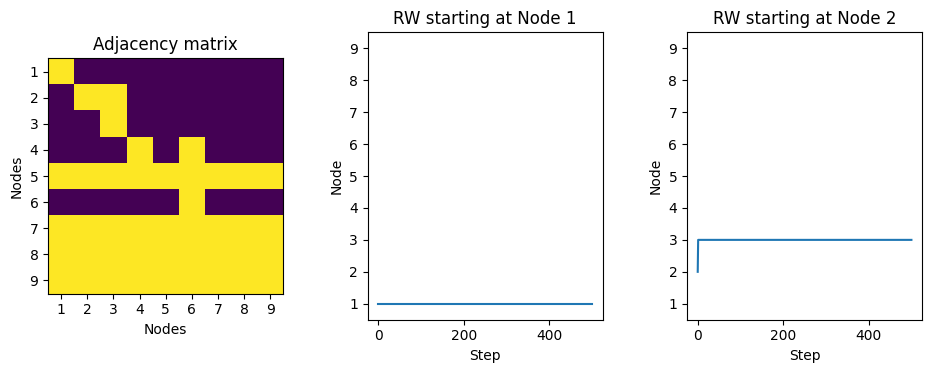

In [227]:
K_tmp = K_approx.transpose()
P_bool = np.absolute(K_tmp) > 1e-8
P = A_bool.astype(int) # this matrix considered as the edge probability matrix to obtain a directed graph. 
G = weight2digraph(P)
A = nx.adjacency_matrix(G, nodelist=list(G.nodes()))

# print(type(A1))
rw1 = RW(G, x0 = 0, steps = 500, return_history = True)
rw1.insert(0,0)
rw2 = RW(G, x0 = 1, steps = 500, return_history = True)
rw2.insert(0,1)

fig, ax = plt.subplots(1, 3, figsize = (10,4))
fig.tight_layout(pad=3.0)
ax[0].imshow(A.todense());
ax[0].set_xticks(np.arange(0, 9),[str(x) for x in np.arange(1, 10)]);
ax[0].set_yticks(np.arange(0, 9),[str(x) for x in np.arange(1, 10)]);
ax[0].set_xlabel('Nodes');
ax[0].set_ylabel('Nodes');
ax[0].set_title('Adjacency matrix');

ax[1].plot(rw1)
ax[1].set_yticks(np.arange(0, 9),[str(x) for x in np.arange(1, 10)]);
ax[1].set_ylim([-0.5, 8.5]);
ax[1].set_xlabel('Step');
ax[1].set_ylabel('Node');
ax[1].set_title('RW starting at Node 1');

ax[2].plot(rw2)
ax[2].set_yticks(np.arange(0, 9),[str(x) for x in np.arange(1, 10)]);
ax[2].set_ylim([-0.5, 8.5]);
ax[2].set_xlabel('Step');
ax[2].set_ylabel('Node');
ax[2].set_title('RW starting at Node 2');

plt.savefig('Results_9obs.png')